<a href="https://colab.research.google.com/github/huda-nur-ed/Team-4---Capston-project--Prediction-of-close-price-Nifty50/blob/main/Team_4_Capston_project_Prediction_of_close_price_Nifty50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##  Objective :
* ### To perform time series analysis on the NIFTY stock price and forecasting using univariate ARIMA and ARIMAX modeling technique. 
* ### We further simplified the problem  to  predict the direction of Close price  movements in the next N days (throughout our experiments N can take values 1, 5, and 30). Initially, we will take N=1, that means we want to predict the NIFTY 50  Close price  movement in the next day. This is represented as a classification task where there are two possible outcomes (either the index went up in the next day or it went down).



## Importing libararies

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 4.3MB/s 
     |████████████████████████████████| 9.5MB 35.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import lightgbm as lgb
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product                   # some useful functions
from tqdm import tqdm_notebook

%matplotlib inline

##Dataset Details

We contain dataset of daily stock prices of Nifty50 from  3rd January 2000 to  10th May 2021.

*The **NIFTY 50** is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange.*

Description of columns in the Dataset:

* Date — Date of trade
* Open — The open is the starting period of trading on a securities exchange or organized over-the-counter market.
* High — Highest price at which a stock traded during the course of the trading day.
* Low — Lowest price at which a stock traded during the course of the trading day.
* Close — The close is a reference to the end of a trading session in the financial markets when the markets close for the day.

## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone project/Yes bank share price/Nifty50_data.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


#### Understanding the dataset

In [ ]:
# Get a brief summary on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301 entries, 0 to 5300
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5301 non-null   object 
 1   Open    5266 non-null   float64
 2   High    5266 non-null   float64
 3   Low     5266 non-null   float64
 4   Close   5266 non-null   float64
dtypes: float64(4), object(1)
memory usage: 207.2+ KB


In [ ]:
#finding count of null values for each columns
df.isna().sum()

Date      0
Open     35
High     35
Low      35
Close    35
dtype: int64

In [ ]:
#droping Null values
df.dropna(inplace=True)

In [ ]:
# checking for null value
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
df.shape

(5266, 5)

#### Conclusion:


* There were 35 null values in initial dataframe which includes the date when the trading didn't happen.
* All null values rows are droped from the dataset for further analysis.
* The data now have 5266 rows and 5 columns.

### EDA 

### Summary

In [ ]:
#discribe the data set
df.describe()

,Open,High,Low,Close
count,5266.000000,5266.000000,5266.000000,5266.000000
mean,5551.787316,5588.846043,5506.832156,5548.545092
std,3582.719644,3594.485464,3561.245855,3578.111274
min,853.000000,877.000000,849.950000,854.200000
25%,2057.987500,2074.525000,2045.950000,2058.750000
50%,5213.675049,5252.199951,5163.449951,5211.025000
75%,8261.987305,8308.112793,8216.375244,8262.199707
max,15371.450195,15431.750000,15243.400391,15314.700195


####From above summary we can find that

we can conclude that each feature as similar type of statistical measurement.
* Mean and median of each feature is close fro all features
* Standard deviation is also somewhat similar in all features 

## Visualization


In [ ]:
# Change data type of Date column into datetime
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date',inplace=True)

#### Line plot

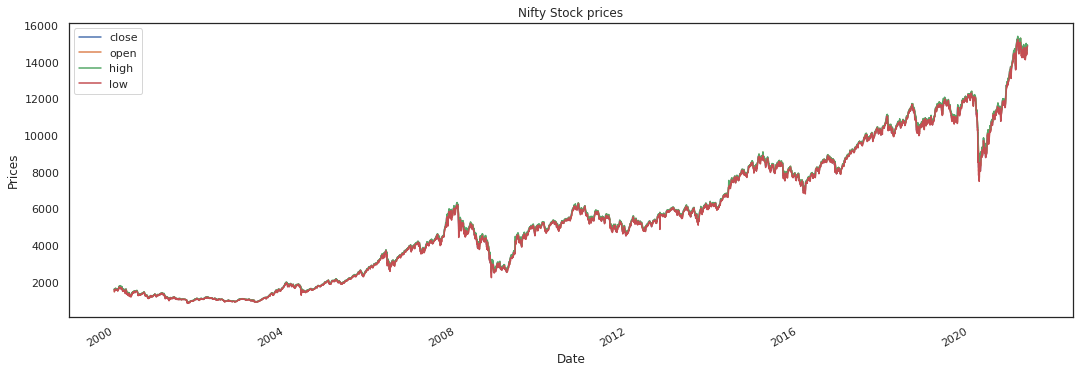

In [ ]:
#Multi Line plot
plt.subplots(figsize=(18,6))
plt.xlabel('Date')
plt.ylabel('Prices')
df['Close'].plot(label='close')
df['Open'].plot(label='open')
df['High'].plot(label='high')
df['Low'].plot(label='low')
plt.legend()
plt.title('Nifty Stock prices')
plt.show()

From the above graphs, we have observed that-
* there is a drastic drop in stock prices in 2007-2009 period.This  can be attributed to the Great Recession that happened during this period.
* also, there is a drop in stock prices in the year 2016. This can be attributed to Demonitisation drive by the central government.

* again ,there is a drastic drop in stock prices in 2020. This is due to the global breakdown amid coronavirus pandemic induced lockdown in India.

* by the end of 2020, the stock price started rising.This can be attributed to the lifting of lockdown in the country and across the world. 

## Forcasting using univarate ARIMA and ARIMAX modeling technique




First thing we will do is decomposition of time series to find the Trend, Seasonality , residual in our data.




## Decomposition 

we will do is decomposition of time series to find the Trend, Seasonality , residual in our data.

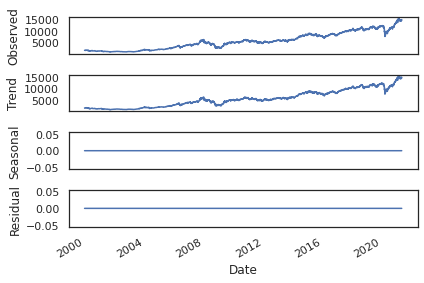

In [ ]:
# decomposition 
result = seasonal_decompose(df['Close'], model='additive',freq=1)
result.plot()
plt.show()

From above decomposition we can conclude
* Trend is increasing
* No seasonality in the data
* No residual in data

### Checking randomness of data.

In time series problem we need to make sure that our current day data is related to previous data points and there data points should not be random. If data points are randomly selscted that it become hard to forcast.




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


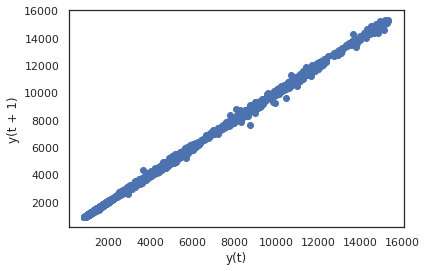

In [ ]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(df['Close'])
plt.show()

Here we can see that our previous day data and current day data is linearly realted.

##  Checking Stationarity

we can check stationarity with the help of adfuller.

* Null Hypothesis ($H_o $) is that our data is Non-stationary
* Alternative Hypothesis ($H_1)$  that our data is Statinary

In [ ]:
def adfuller_test(sales):
  result=adfuller(sales)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
  for value,label in zip(result,labels):
      print(label+' : '+str(value) )

  if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
      print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [ ]:

#  function to plot Autocorrealtion and partial corelation 

def cor_plots(x):
  fig = plt.figure(figsize=(12,8))
  ax1 = fig.add_subplot(211)
  fig = sm.graphics.tsa.plot_acf(df[x].dropna(),lags=24,ax=ax1)
  ax2 = fig.add_subplot(212)
  fig = sm.graphics.tsa.plot_pacf(df[x].dropna(),lags=24,ax=ax2)

In [ ]:
adfuller_test(df['Close'])

ADF Test Statistic : 0.7938385840940094
p-value : 0.9915360574288862
#Lags Used : 29
Number of Observations : 5236
weak evidence against null hypothesis,indicating it is non-stationary 


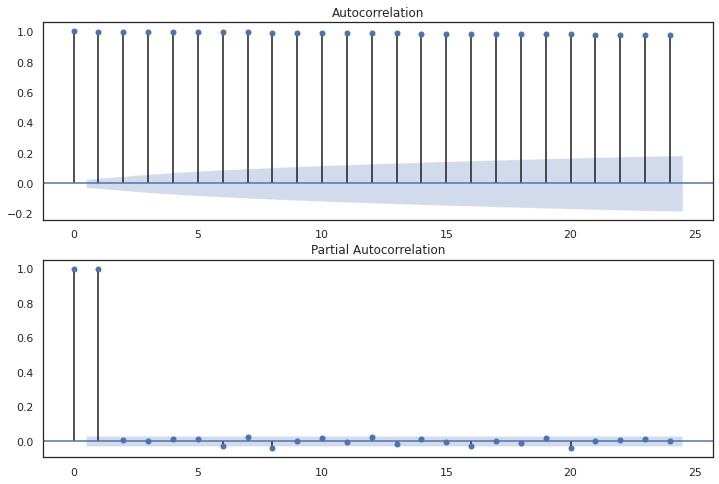

In [ ]:
cor_plots('Close')

### Checking with stationarity of the first difference:

In [ ]:
#apply adf test on the first difference clossing price series
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)

In [ ]:
adfuller_test(df['Close First Difference'].dropna())

ADF Test Statistic : -13.208863127403244
p-value : 1.0570660730866936e-24
#Lags Used : 28
Number of Observations : 5236
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


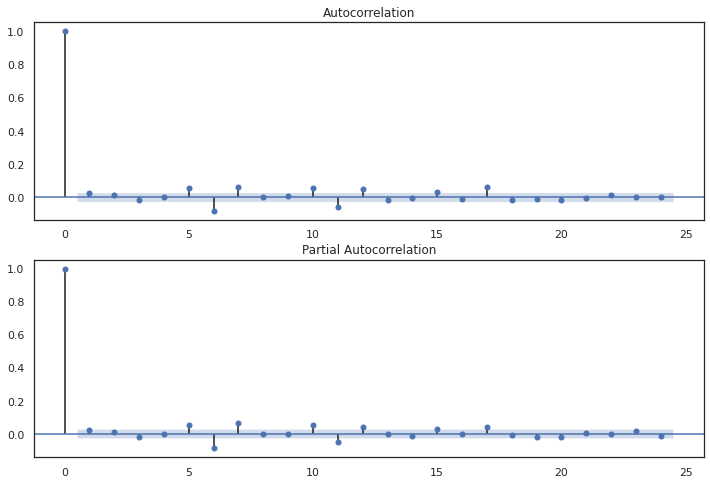

In [ ]:
cor_plots('Close First Difference')

###Feature Engineering

In [ ]:
final_df = df.copy()

### Moving average 

finding moving average different time period


In [ ]:
def moving_avg(df,col, day):
  var_name = col + str(day)
  df[var_name + '_ma']= df[col]-df[col].rolling(window=day,min_periods=day).mean()
  df[var_name+ '_ewma']= df[col]-df[col].ewm(com=day).mean()
  return df



In [ ]:
# findind mean average for 
days= [3,7,15,30]
cols= ['High','Low',"Open",'Close']
for col in cols:
  for day in days:
    moving_avg(final_df,col,day)

In [ ]:
final_df

,Open,High,Low,Close,Close First Difference,High3_ma,High3_ewma,High7_ma,High7_ewma,High15_ma,High15_ewma,High30_ma,High30_ewma,Low3_ma,Low3_ewma,Low7_ma,Low7_ewma,Low15_ma,Low15_ewma,Low30_ma,Low30_ewma,Open3_ma,Open3_ewma,Open7_ma,Open7_ewma,Open15_ma,Open15_ewma,Open30_ma,Open30_ewma,Close3_ma,Close3_ewma,Close7_ma,Close7_ewma,Close15_ma,Close15_ewma,Close30_ma,Close30_ewma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1482.150000,1592.900000,1482.150000,1592.200000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
2000-01-04,1594.400000,1641.950000,1594.400000,1638.700000,46.500000,NaN,21.021429,NaN,22.890000,NaN,23.733871,NaN,24.122951,NaN,48.107143,NaN,52.383333,NaN,54.314516,NaN,55.204918,NaN,48.107143,NaN,52.383333,NaN,54.314516,NaN,55.204918,NaN,19.928571,NaN,21.700000,NaN,22.500000,NaN,22.868852
2000-01-05,1634.550000,1635.500000,1555.050000,1595.800000,-42.900000,12.050000,8.270270,NaN,10.214201,NaN,11.147018,NaN,11.587782,11.183333,4.970270,NaN,8.097633,NaN,9.651179,NaN,10.395736,64.183333,50.091892,NaN,57.491124,NaN,60.923717,NaN,62.522214,-13.100000,-13.037838,NaN,-13.171598,NaN,-13.156727,NaN,-13.134002
2000-01-06,1595.800000,1639.000000,1595.800000,1617.600000,21.800000,0.183333,7.465714,NaN,9.571622,NaN,10.623533,NaN,11.128337,14.050000,28.999714,NaN,34.092478,NaN,36.556150,NaN,37.723703,-12.450000,7.194000,NaN,13.080088,NaN,16.082674,NaN,17.533738,0.233333,5.557714,NaN,6.022065,NaN,6.268996,NaN,6.391804
2000-01-07,1616.600000,1628.250000,1597.200000,1613.300000,-4.300000,-6.000000,-2.207746,NaN,-0.875976,NaN,-0.097808,NaN,0.297628,14.516667,20.435147,NaN,26.384202,NaN,29.354886,NaN,30.777595,0.950000,18.817990,NaN,25.185593,NaN,28.524671,NaN,30.156150,4.400000,0.845455,NaN,1.280139,NaN,1.522801,NaN,1.645568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000,-137.650391,-27.499674,-20.259163,-49.792410,-0.144149,77.790365,-28.263279,-5.784602,61.133460,-31.650065,-44.948074,-94.928571,-31.541788,51.219922,-58.916631,-30.890006,26.773870,48.700195,54.593492,37.478655,72.518878,150.000000,35.599878,54.979948,117.210475,-90.750000,-116.496961,-169.107143,-112.845352,-42.000000,-143.307789,-122.308301,-56.102140
2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609,121.349609,-40.483073,-79.319372,-146.778180,-74.938631,-6.736328,-106.653074,-83.374609,-23.580523,45.149739,0.113651,-62.014649,11.863094,79.126237,-12.953458,13.276269,69.554980,13.333659,-21.379588,-67.720982,-9.258139,69.600391,-44.530998,-19.741341,33.010515,35.016276,3.639486,-66.736050,7.441225,58.879622,-20.585794,-2.958692,63.142711
2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,106.950196,42.166667,20.010471,-51.685407,27.178698,84.930339,-0.612257,24.103711,79.760784,84.966797,78.760532,24.792829,102.168049,161.586654,86.200249,109.463314,168.827778,15.099609,32.114723,-28.457450,48.073444,113.569661,18.438957,37.884570,94.073935,111.750000,82.942262,29.964146,100.092493,151.163151,80.966627,104.631511,164.606040


In [ ]:
exogenous_features= final_df.columns.drop(['Open','High','Low','Close'])
exogenous_features

Index(['Close First Difference', 'High3_ma', 'High3_ewma', 'High7_ma',
       'High7_ewma', 'High15_ma', 'High15_ewma', 'High30_ma', 'High30_ewma',
       'Low3_ma', 'Low3_ewma', 'Low7_ma', 'Low7_ewma', 'Low15_ma',
       'Low15_ewma', 'Low30_ma', 'Low30_ewma', 'Open3_ma', 'Open3_ewma',
       'Open7_ma', 'Open7_ewma', 'Open15_ma', 'Open15_ewma', 'Open30_ma',
       'Open30_ewma', 'Close3_ma', 'Close3_ewma', 'Close7_ma', 'Close7_ewma',
       'Close15_ma', 'Close15_ewma', 'Close30_ma', 'Close30_ewma'],
      dtype='object')

In [ ]:
# Splitting train set and validation test
nifty_train = final_df[final_df.index < "2019"]
nifty_valid = final_df[final_df.index >= "2019"]

## Auto regressor

In [ ]:
pip install statsmodels --upgrade


Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [ ]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import lightgbm as lgb
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [ ]:
# Auto regressor model
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(nifty_train.Close,lags=3, exog=nifty_train[exogenous_features])
res = model.fit()
print(res.summary())
print("μ={} ,ϕ={}".format(res.params[0],res.params[1]))

ImportError: ignored

In [ ]:
# with covariance type HC0
res = model.fit(cov_type="HC0")
print(res.summary())
print("μ={} ,ϕ={}".format(res.params[0],res.params[1]))


                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 4721
Model:                   AutoReg-X(3)   Log Likelihood              -26112.205
Method:               Conditional MLE   S.D. of innovations             61.292
Date:                Sat, 15 May 2021   AIC                              8.242
Time:                        03:50:19   BIC                              8.276
Sample:                             3   HQIC                             8.254
                                 4721                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -5.4155      2.902     -1.866      0.062     -11.103       0.271
Close.L1    -2.805e+04   1.98e+04     -1.418      0.156   -6.68e+04    1.07e+04
Close.L2    -2333.0110   2505.133     -0.931    

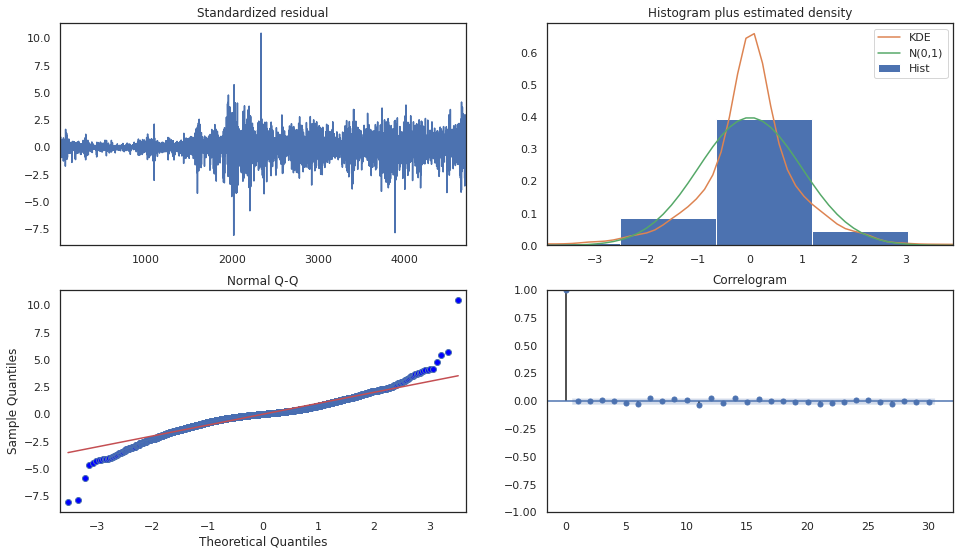

In [ ]:
# Plot diagnostics of auto-regressor model
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)



Interpretation of above plots : 
To ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. 
In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

Residuals are nearly normally distributed as KDE and N lines are closely followed but with different peaks.


The qq-plot shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1) with slight deviations at times. 

The residuals over time don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot which shows that the time series residuals have low correlation with lagged versions of itself.


Those observations can be used conclude that our model produces a good fit that help us to understand our time series data and forecast future values.

In [ ]:
from pmdarima import auto_arima

In [ ]:
df_1= df.copy()
df_1.dropna(inplace=True)

In [ ]:
df_1

,Open,High,Low,Close,Close First Difference
Date,,,,,
2000-01-04,1594.400000,1641.950000,1594.400000,1638.700000,46.500000
2000-01-05,1634.550000,1635.500000,1555.050000,1595.800000,-42.900000
2000-01-06,1595.800000,1639.000000,1595.800000,1617.600000,21.800000
2000-01-07,1616.600000,1628.250000,1597.200000,1613.300000,-4.300000
2000-01-10,1615.650000,1662.100000,1614.950000,1632.950000,19.650000
...,...,...,...,...,...
2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000,-137.650391
2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609,121.349609
2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,106.950196


In [ ]:
df_train = df_1[df_1.index < "2019"]
df_valid = df_1[df_1.index >= "2019"]

In [ ]:
model = auto_arima(df_train.Close, trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Close)

forecast = model.predict(n_periods=len(df_valid))
df_valid["Forecast_ARIMA"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=52008.719, Time=9.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=52034.889, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=52013.033, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=52012.578, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=52037.634, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=52016.347, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=52011.890, Time=4.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=52015.855, Time=5.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=52014.469, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=52013.388, Time=4.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=52012.630, Time=4.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=52003.375, Time=11.17 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.52 sec
 ARIMA(3,1,4)(0,0,0)[0] inter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


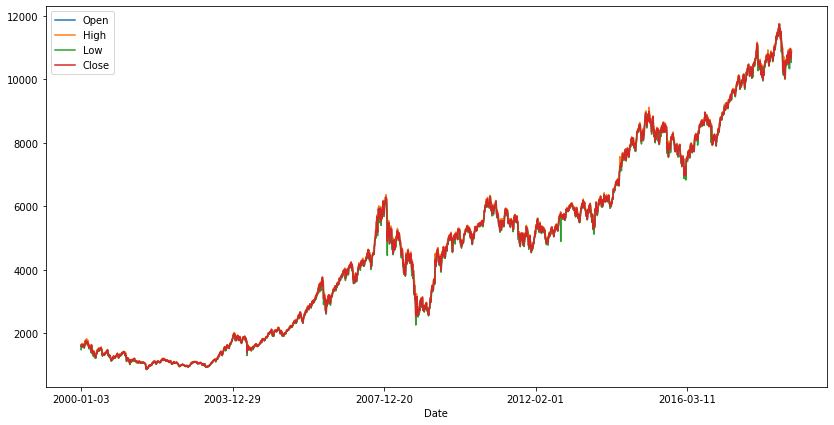

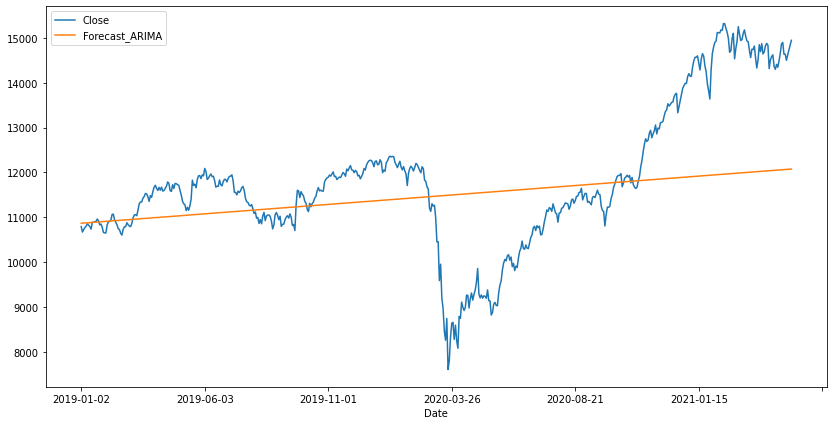

In [ ]:
df_train.plot(figsize=(14, 7))
df_valid[["Close", "Forecast_ARIMA"]].plot(figsize=(14, 7))

In [ ]:
# Importing 

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Calculating error for Auto-Arima without exgenous features
print("mean absoulte percentage error:", round(mean_absolute_percentage_error(nifty.Close, forecast.Prediction),2),"%")

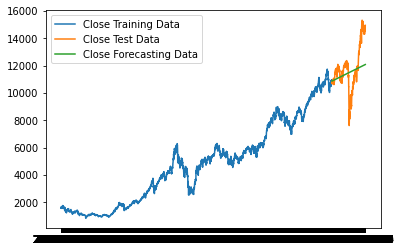

In [ ]:
# Plot forcasting Close price
forecast_df = pd.DataFrame(forecast,index = df_valid.index,columns=['Prediction'])
plt.plot(df_train['Close'],label='Close Training Data')
plt.plot(df_valid['Close'],label='Close Test Data')
plt.plot(forecast_df['Prediction'],label='Close Forecasting Data')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(df_valid.Close, df_valid.Forecast_ARIMA)))
print("\nMAE of Auto ARIMA:", mean_absolute_error(df_valid.Close, df_valid.Forecast_ARIMA))

RMSE of Auto ARIMA: 1443.0959401460502

MAE of Auto ARIMA: 1063.7831745963458


# Using ARIMAX for forcasting:

In [ ]:
nifty_data.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


In [ ]:
df= nifty_data.copy()
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low", "Close"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)
df.set_index("Date", drop=True, inplace=True)
df.head()

,Open,High,Low,Close,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,5547.483398,5542.514160,5514.119141,45.522327,68.892075,141.049759,5584.558594,5579.578125,5551.036133,38.862560,62.409687,135.257034,5502.552246,5497.606445,5469.410156,43.983521,69.701912,144.373383,5544.258789,5539.302246,5510.930664,44.819336,68.637215,140.728851
2000-01-04,1594.40,1641.95,1594.40,1638.7,1482.150024,1482.150024,1482.150024,45.522327,68.892075,141.049759,1592.900024,1592.900024,1592.900024,38.862560,62.409687,135.257034,1482.150024,1482.150024,1482.150024,43.983521,69.701912,144.373383,1592.199951,1592.199951,1592.199951,44.819336,68.637215,140.728851
2000-01-05,1634.55,1635.50,1555.05,1595.8,1538.275024,1538.275024,1538.275024,79.372734,79.372734,79.372734,1617.425049,1617.425049,1617.425049,34.683586,34.683586,34.683586,1538.275024,1538.275024,1538.275024,79.372734,79.372734,79.372734,1615.449951,1615.449951,1615.449951,32.880466,32.880466,32.880466
2000-01-06,1595.80,1639.00,1595.80,1617.6,1570.366699,1570.366699,1570.366699,78.991394,78.991394,78.991394,1623.449951,1623.449951,1623.449951,26.652908,26.652908,26.652908,1543.866699,1543.866699,1543.866699,56.954506,56.954506,56.954506,1608.900024,1608.900024,1608.900024,25.870253,25.870253,25.870253
2000-01-07,1616.60,1628.25,1597.20,1613.3,1608.250000,1576.724976,1576.724976,22.787222,65.737923,65.737923,1638.816650,1627.337524,1627.337524,3.228906,23.109211,23.109211,1581.750000,1556.849976,1556.849976,23.133471,53.261726,53.261726,1617.366699,1611.074951,1611.074951,21.450953,21.566235,21.566235


In [ ]:
df_train = df[df.index < "2019"]
df_valid = df[df.index >= "2019"]

In [ ]:
df_train.shape

(4690, 28)

In [ ]:
exogenous_features= ['Open_mean_lag3', 'Open_mean_lag7',
       'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7', 'Open_std_lag30',
       'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30', 'High_std_lag3',
       'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7',
       'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7', 'Low_std_lag30',
       'Close_mean_lag3', 'Close_mean_lag7', 'Close_mean_lag30',
       'Close_std_lag3', 'Close_std_lag7', 'Close_std_lag30']

In [ ]:
model = auto_arima(df_train.Close, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Close, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55849.574, Time=46.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=55645.695, Time=6.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55587.972, Time=26.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56024.239, Time=37.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57996.930, Time=35.88 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55781.521, Time=39.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55615.998, Time=46.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=56163.215, Time=36.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=55685.094, Time=26.89 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 301.147 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


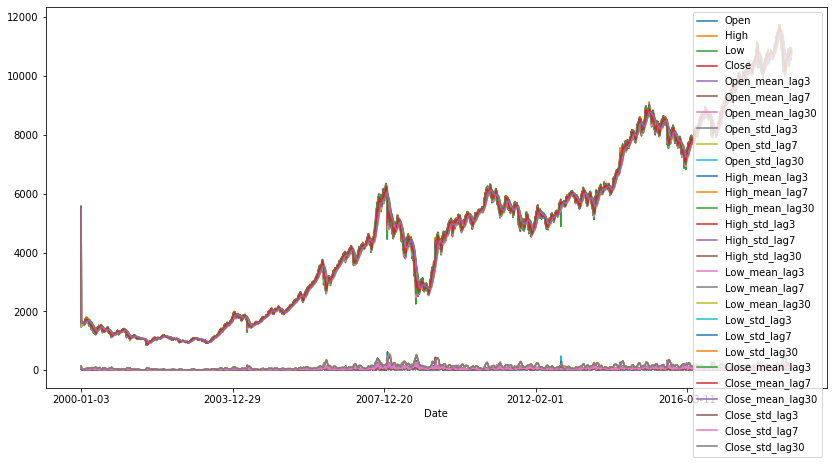

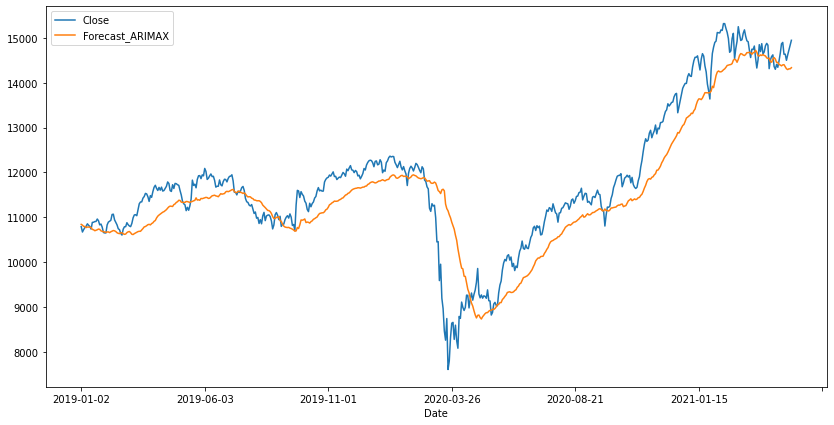

In [ ]:
df_train.plot(figsize=(14, 7))
df_valid[["Close", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [ ]:
df_valid['Close']

Date
2019-01-02    10792.500000
2019-01-03    10672.250000
2019-01-04    10727.349609
2019-01-07    10771.799805
2019-01-08    10802.150391
                  ...     
2021-05-04    14496.500000
2021-05-05    14617.849609
2021-05-06    14724.799805
2021-05-07    14823.150391
2021-05-10    14942.349609
Name: Close, Length: 576, dtype: float64

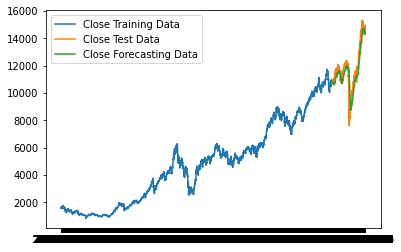

In [ ]:
# Plot forcasting Close price
forecast_df = pd.DataFrame(forecast,index = df_valid.index,columns=['Prediction'])
plt.plot(df_train['Close'],label='Close Training Data')
plt.plot(df_valid['Close'],label='Close Test Data')
plt.plot(forecast_df['Prediction'],label='Close Forecasting Data')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Close, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Close, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 666.2609346258823

MAE of Auto ARIMAX: 496.2560709657612


## Facebook Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
!pip install prophet

     |████████████████████████████████| 71kB 3.2MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 184kB 6.2MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6639589 sha256=ed75071442eab26657e7c97324ec20d4c3dfcf22a8a6f0e9cb59df5c6c66e526
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
#Renaming columns
df = nifty_train[["Date", "Close"] + exogenous_features].rename(columns={"Date": "ds", "Close": "y"})

In [ ]:
from prophet import Prophet


In [ ]:
# fiting model
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Making data frame for future dates
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
5306,2021-05-16
5307,2021-05-17
5308,2021-05-18
5309,2021-05-19
5310,2021-05-20


In [ ]:
# pedicting for future dates
forecast = m.predict(future)
x = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
x.tail()

,ds,yhat,yhat_lower,yhat_upper
5306,2021-05-16,12925.809969,12235.930017,13647.826893
5307,2021-05-17,12911.466036,12231.219490,13597.277373
5308,2021-05-18,12915.188746,12242.887958,13635.668935
5309,2021-05-19,12911.564833,12282.123490,13593.068759
5310,2021-05-20,12925.482556,12297.763665,13622.617548


In [ ]:
# Storing values of Forecast prophet
x.drop(['yhat_lower','yhat_upper'],axis =1,inplace = False)
df = df.append(x)
df = df.rename(columns = {'yhat':'Forecast_Prophet'} )

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_components_plotly(m, forecast)


In [ ]:


plot_plotly(m, forecast)

In [ ]:
from fbprophet import Prophet
# Facebook Prophet
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(nifty_train[["Date", "Close"] + exogenous_features].rename(columns={"Date": "ds", "Close": "y"}))

forecast = model_fbp.predict(nifty_valid[["Date", "Close"] + exogenous_features].rename(columns={"Date": "ds"}))
nifty_valid["Forecast_Prophet"] = forecast.yhat.values


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


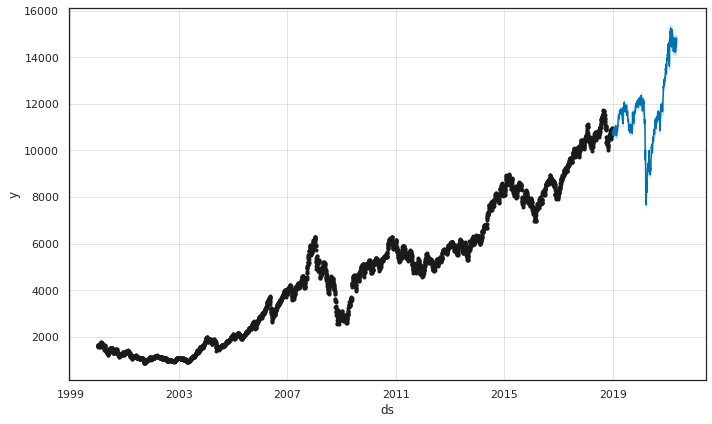

In [ ]:
fig = model_fbp.plot(forecast)

The plots show that trends of decreasing from monday to saturday and january to december.

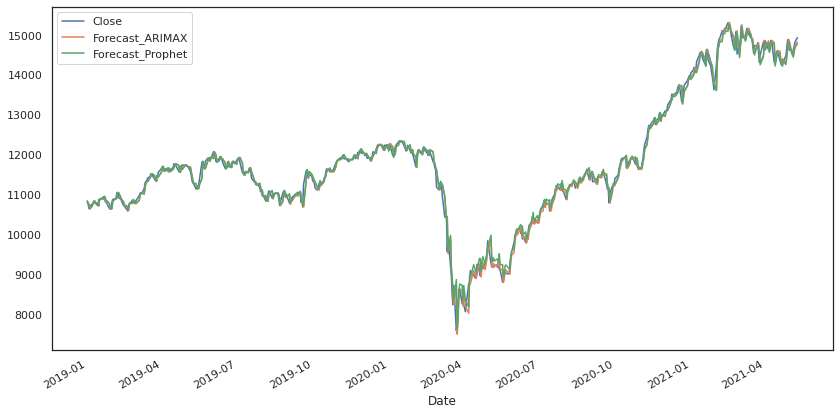

In [ ]:


nifty_valid[["Close", "Forecast_ARIMAX", "Forecast_Prophet"]].plot(figsize=(14, 7))


In [ ]:
print("mean absoulte percentage error:", round(mean_absolute_percentage_error(nifty_valid.Close, nifty_valid.Forecast_Prophet),2),"%")

mean absoulte percentage error: 0.98 %


# Approching the problem by Classifaction

We though of approaching the problem as just predicting the direction of Close price next day. will our Closing price will increase or decrease the next day.



In [ ]:
# Creating target variables
data_df.loc[(data_df['Close']-data_df['Close'].shift(1)) < 0,'Target']=0
data_df.loc[(data_df['Close']-data_df['Close'].shift(1)) >= 0,'Target']=1

In [ ]:
data_df.Target.value_counts()

lets try to see how our target value have varied

Visualization of Dependent variables

In [ ]:
GB = final_df.groupby([final_df.index.year])

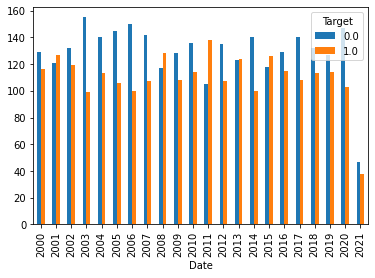

In [ ]:
GB['Target'].value_counts().unstack().plot(kind= 'bar')

This bar plot represent the total number of up and down seen in each  year of past 21 years
* as in year 2008 due to downfall of market we can see that close price decreased more each day.


2000


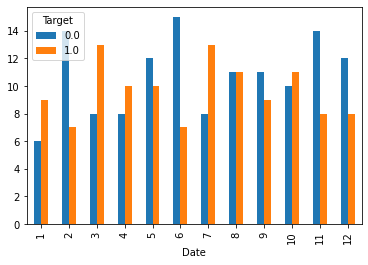

2001


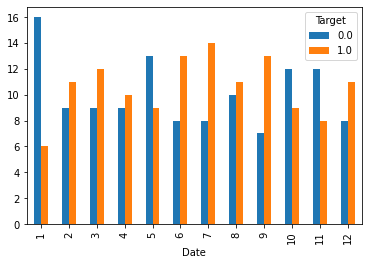

2002


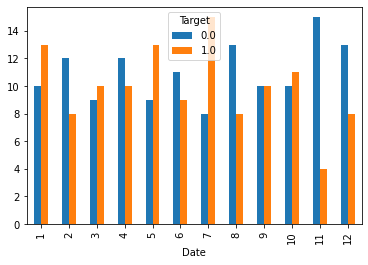

2003


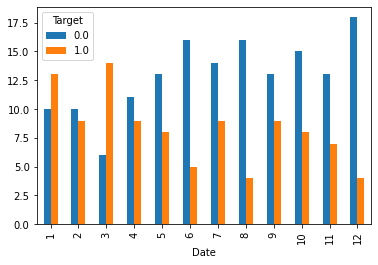

2004


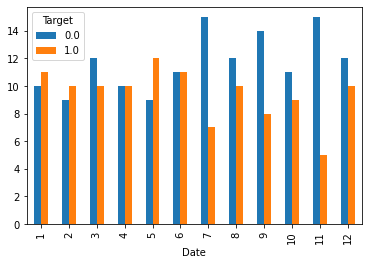

2005


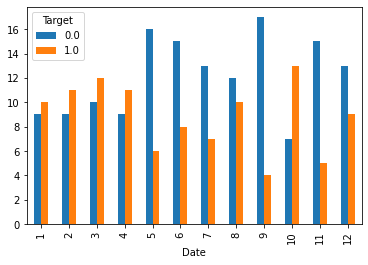

2006


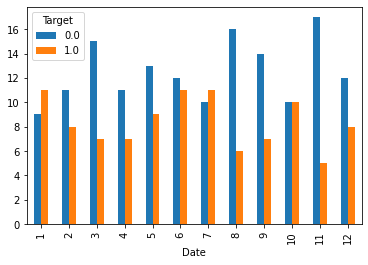

2007


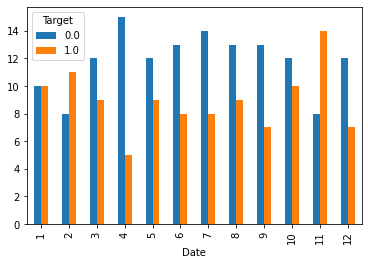

2008


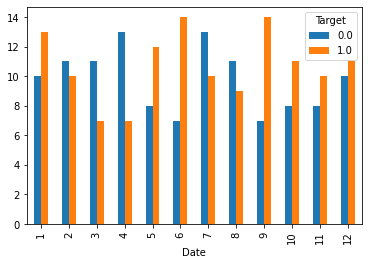

2009


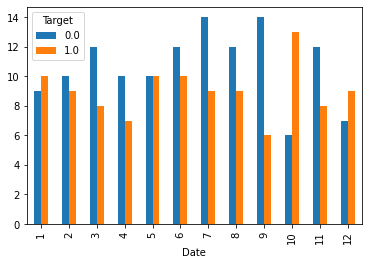

2010


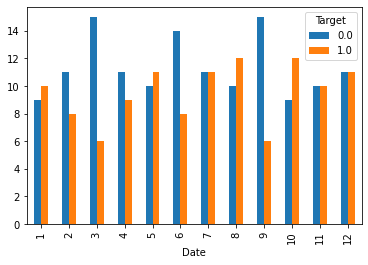

2011


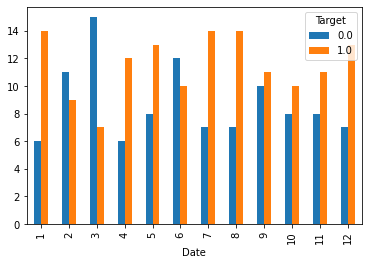

2012


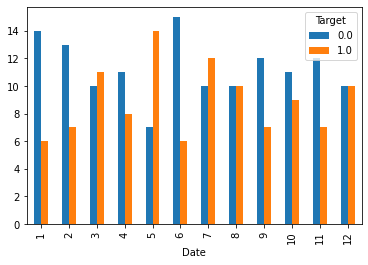

2013


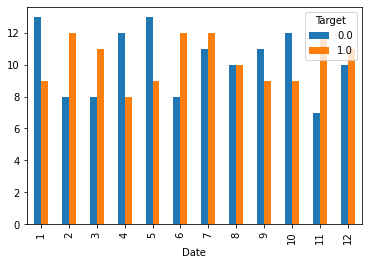

2014


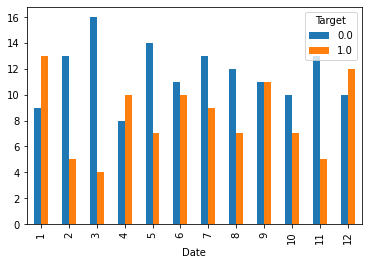

2015


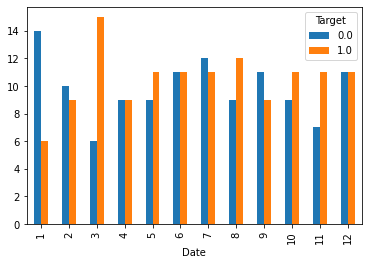

2016


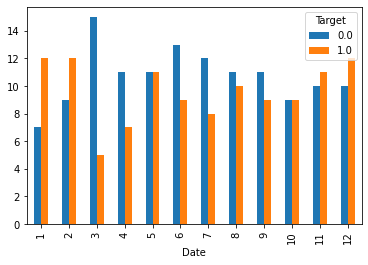

2017


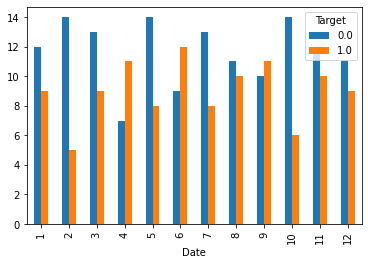

2018


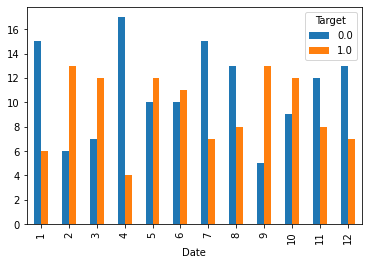

2019


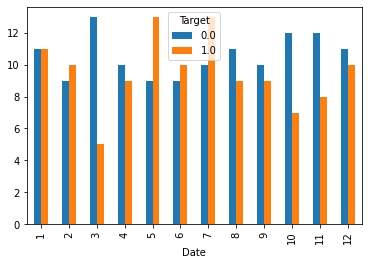

2020


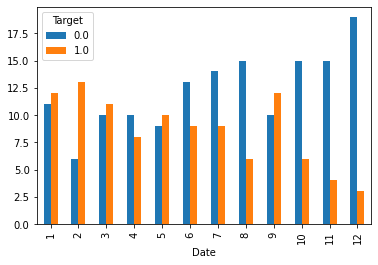

2021


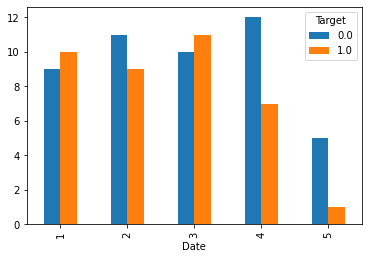

In [ ]:
# Get distribution of each classes of Traget variable across a year's different months
for year, year_df in GB:
  print(year)

  year_df.groupby([year_df.index.month])['Target'].value_counts().unstack().plot(kind='bar')
  plt.show()
  


Here, we have bar plot which represent how our target value classes distributes across months in a year.

#### Corelation of independent feature and dependent features

In [ ]:
# Get correlation among features
cor_matrix =abs( final_df.corr())

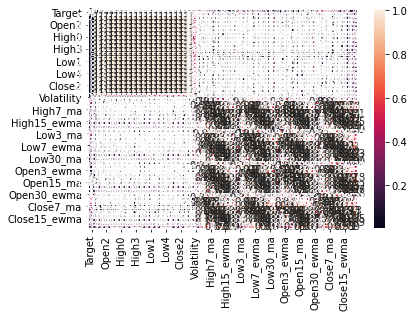

In [ ]:
# Get heatmap of correlation among features
sns.heatmap(cor_matrix,annot = True)

In [ ]:
# Get correlation between Target variable and other features
cor_matrix['Target'].sort_values(ascending=False)

Target          1.000000
Close3_ma       0.572338
Close3_ewma     0.425850
Close7_ma       0.412569
Low3_ma         0.387090
High3_ma        0.362793
Close7_ewma     0.308490
Low3_ewma       0.285097
Close15_ma      0.280282
Low7_ma         0.275293
High3_ewma      0.256399
High7_ma        0.250080
Close15_ewma    0.218697
Low7_ewma       0.207123
Close30_ma      0.200175
Low15_ma        0.185911
High7_ewma      0.181874
High15_ma       0.164469
Close30_ewma    0.158650
Low15_ewma      0.148316
Open3_ma        0.139861
Low30_ma        0.136100
High15_ewma     0.126978
High30_ma       0.117650
Low30_ewma      0.108936
Open3_ewma      0.102672
Open7_ma        0.100855
Volatility      0.098842
High30_ewma     0.091388
Open7_ewma      0.074256
Open15_ma       0.064780
Open15_ewma     0.052985
Open30_ma       0.050501
Open30_ewma     0.039166
Open3           0.005814
Low3            0.005800
High3           0.005670
Close3          0.005624
Close2          0.005624
Open2           0.005521


Spliting data into test, train and validation sets

In [ ]:
def temporal_splitting(data,date1,date2,date3):
    '''
    Function to split the dataset into train, validation and test setsbased on certain date.
    '''
    train=data.loc[(data.index >= date1) & (data.index < date2)]
    val=data.loc[(data.index >= date2) & (data.index < date3),:]
    test=data.loc[data.index >= date3]
    
    return train, val, test

i try to divide my training validation nad test data as 

* 16 years for training
* 3 year for validation
* 2 years for testing

In [ ]:
# Defining our training data consisting of independent variables and the dependent variable
train, val,test=temporal_splitting(final_df,'2000-01-01','2016-01-01','2019-06-01')

Get Distribution for test , validation and test sets

In [ ]:
train.shape,val.shape,test.shape

((3948, 54), (837, 54), (476, 54))

Get independent and dependent variables

In [ ]:
# Get independent vraiables
ind_var= final_df.columns.drop('Target')

In [ ]:
ind_var

Index(['Open0', 'Open1', 'Open2', 'Open3', 'Open4', 'High0', 'High1', 'High2',
       'High3', 'High4', 'Low0', 'Low1', 'Low2', 'Low3', 'Low4', 'Close0',
       'Close1', 'Close2', 'Close3', 'Close4', 'Volatility', 'High3_ma',
       'High3_ewma', 'High7_ma', 'High7_ewma', 'High15_ma', 'High15_ewma',
       'High30_ma', 'High30_ewma', 'Low3_ma', 'Low3_ewma', 'Low7_ma',
       'Low7_ewma', 'Low15_ma', 'Low15_ewma', 'Low30_ma', 'Low30_ewma',
       'Open3_ma', 'Open3_ewma', 'Open7_ma', 'Open7_ewma', 'Open15_ma',
       'Open15_ewma', 'Open30_ma', 'Open30_ewma', 'Close3_ma', 'Close3_ewma',
       'Close7_ma', 'Close7_ewma', 'Close15_ma', 'Close15_ewma', 'Close30_ma',
       'Close30_ewma'],
      dtype='object')

In [ ]:
# Defining Target feature
dept_var=['Target']

Defining training data

In [ ]:
X_train= train[ind_var]
X_val = val[ind_var]
X_test = test[ind_var]

y_train= train[dept_var]
y_val = val[dept_var]
y_test = test[dept_var]

#### Obtaining the distribution of classes of dependent variable across three datasets

In [ ]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

Target
0.0       2116
1.0       1832
dtype: int64
Target
0.0       453
1.0       384
dtype: int64
Target
0.0       269
1.0       207
dtype: int64


In [ ]:
pip install bayesian-optimization

In [ ]:
# Import libraries to be used in training our data
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit

import xgboost as xgb
import lightgbm as lgb
import bayes_opt as bayso
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Function to set parameters
def lgbcv1(min_child_weight,
           colsample_bytree,
           max_depth,
           subsample,
           min_gain_to_split,
           reg_alpha,
           reg_lambda):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting': 'gbdt',
        'random_state' : 501, # Updated from 'seed'
        'n_estimators' : 200,
        'learning_rate': 0.1,
        'early_stopping_round' : 10,
        'verbose': 20,
        'num_leaves': 65,
        'min_data_in_leaf': 500,
        'bagging_freq': 1,
        'bagging_seed': RS,
        'feature_fraction_seed': RS,
        'max_bin': 50,
        'min_child_weight': int(min_child_weight),
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'max_depth': int(max_depth),
        'subsample': max(min(subsample, 1), 0),
        'min_gain_to_split': max(min_gain_to_split,0),
        'reg_alpha': max(reg_alpha,0),
        'reg_lambda': max(reg_lambda,0)
    }


    cv_result = lgb.cv(params, lgtrain, nfold=5, seed=0, verbose_eval =200,stratified=False,shuffle=False)

    return max(cv_result['auc-mean'])

In [ ]:
# Function to prepare data
def prepare_data():
    lgtrain = lgb.Dataset(X_train, label=y_train)

    return lgtrain

In [ ]:
if __name__ == '__main__':
    lgtrain =  prepare_data()
    random_state = 2020
    init_points = 30
    numitems=30
    RS = 20200801
    np.random.seed(RS)
    lgbo = bayso.BayesianOptimization(lgbcv1,
                                      {'min_child_weight': (300, 500),
                                      'colsample_bytree': (0.4, 0.7),
                                      'max_depth': (5, 7),
                                      'subsample': (0.3, 1.0),
                                      'min_gain_to_split': (0, 20),
                                      'reg_alpha': (0, 20),
                                      'reg_lambda': (0, 50)})
    
    lgbo.maximize(init_points=init_points, n_iter=numitems)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_ga... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.5      |  0.4448   |  6.5      |  309.5    |  1.904    |  12.94    |  47.46    |  0.303    |
|  2        |  0.5      |  0.6174   |  5.052    |  379.8    |  13.2     |  7.98     |  22.34    |  0.3036   |
|  3        |  0.8633   |  0.5106   |  5.66     |  311.3    |  12.01    |  18.51    |  24.55    |  0.985    |
|  4        |  0.5      |  0.4765   |  6.393    |  497.7    |  17.24    |  17.8     |  14.93    |  0.3435   |
|  5        |  0.5      |  0.6253   |  6.773    |  305.2    |  15.14    |  0.8888   |  22.89    |  0.4052   |
|  6        |  0.5      |  0.618    |  6.767    |  399.7    |  8.584    |  13.72    |  3.62     |  0.4437   |
|  7        |  0.5      |  0.5288   |  6.798    |  334.7    |  9.666    |  8.18     |  19.61    |  0.3896   |
|  8      

In [ ]:
len(lgbo.res)

60

### Finding optimal set of parameters

In [ ]:
max_target=max([lgbo.res[elem]['target'] for elem in range(len(lgbo.res))])
opt_params=[elem['params'] for elem in lgbo.res if elem['target']==max_target][0]

### Updating the model parameters

In [ ]:
opt_params.update({
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt',
    'random_state' : 501, # Updated from 'seed'
    'n_estimators' : 200,
    'learning_rate': 0.1,
    'early_stopping_round' : 10,
    'verbose': 20,
    'num_leaves': 65,
    'min_data_in_leaf': 500,
    'bagging_freq': 1,
    'bagging_seed': RS,
    'feature_fraction_seed': RS,
    'max_bin': 50})
opt_params['min_child_weight'] = int(opt_params['min_child_weight'])
opt_params['colsample_bytree'] = max(min(opt_params['colsample_bytree'], 1), 0)
opt_params['max_depth'] = int(opt_params['max_depth'])
opt_params['subsample'] = max(min(opt_params['subsample'], 1), 0)
opt_params['min_gain_to_split'] = max(opt_params['min_gain_to_split'],0)
opt_params['reg_alpha'] = max(opt_params['reg_alpha'],0)
opt_params['reg_lambda'] = max(opt_params['reg_lambda'],0)

In [ ]:
opt_params

{'bagging_freq': 1,
 'bagging_seed': 20200801,
 'boosting': 'gbdt',
 'colsample_bytree': 0.7,
 'early_stopping_round': 10,
 'feature_fraction_seed': 20200801,
 'learning_rate': 0.1,
 'max_bin': 50,
 'max_depth': 7,
 'metric': 'auc',
 'min_child_weight': 300,
 'min_data_in_leaf': 500,
 'min_gain_to_split': 0.0,
 'n_estimators': 200,
 'num_leaves': 65,
 'objective': 'binary',
 'random_state': 501,
 'reg_alpha': 20.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'verbose': 20}

### Training the model on our optimal set of parameters

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [ ]:
lgb_model = lgb.train(opt_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's auc: 0.725985
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.85903
[3]	valid_0's auc: 0.861332
[4]	valid_0's auc: 0.8622
[5]	valid_0's auc: 0.861229
[6]	valid_0's auc: 0.866463
[7]	valid_0's auc: 0.86824
[8]	valid_0's auc: 0.868084
[9]	valid_0's auc: 0.868492
[10]	valid_0's auc: 0.868492
[11]	valid_0's auc: 0.869332
[12]	valid_0's auc: 0.871332
[13]	valid_0's auc: 0.871332
[14]	valid_0's auc: 0.871442
[15]	valid_0's auc: 0.871442
[16]	valid_0's auc: 0.873514
[17]	valid_0's auc: 0.873514
[18]	valid_0's auc: 0.873606
[19]	valid_0's auc: 0.87364
[20]	valid_0's auc: 0.886296
[21]	valid_0's auc: 0.88629
[22]	valid_0's auc: 0.886336
[23]	valid_0's auc: 0.886336
[24]	valid_0's auc: 0.886336
[25]	valid_0's auc: 0.886325
[26]	valid_0's auc: 0.888009
[27]	valid_0's auc: 0.893548
[28]	valid_0's auc: 0.893548
[29]	valid_0's auc: 0.895146
[30]	valid_0's auc: 0.895336
[31]	valid_0's auc: 0.896802
[32]	valid_0's auc: 0.899524
[33]	valid_0's auc: 0.899

### Getting model probabilities on the three datasets

In [ ]:
train_preds_lgb=lgb_model.predict(X_train)
val_preds_lgb=lgb_model.predict(X_val)
test_preds_lgb=lgb_model.predict(X_test)

In [ ]:
train_preds_lgb

array([0.45694369, 0.54046125, 0.1202286 , ..., 0.18230631, 0.80965234,
       0.13519227])

### Evaluating model performance using metrics like roc-auc and confusion matrix

In [ ]:
# Convert the probs to classes
train_preds_lgb = np.where(train_preds_lgb > 0.5,1,0)
val_preds_lgb   = np.where(val_preds_lgb > 0.5,1,0)
test_preds_lgb  = np.where(test_preds_lgb > 0.5,1,0)

In [ ]:
# Get predictions
train_preds_lgb

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print(accuracy_score(y_train,train_preds_lgb))
print(accuracy_score(y_val,val_preds_lgb))
print(accuracy_score(y_test,test_preds_lgb))

0.8614488348530902
0.8637992831541219
0.8529411764705882


In [ ]:
# Confusion Matrix from Training, Validation and Testing data sets
conf_matrix_train = confusion_matrix(y_train,train_preds_lgb)
conf_matrix_val = confusion_matrix(y_val,val_preds_lgb)
conf_matrix_test = confusion_matrix(y_test,test_preds_lgb)
print("The Confusion Matrix for Train Set \n",conf_matrix_train)
print("\n")
print("The Confusion Matrix for Validation Set \n",conf_matrix_val)
print("\n")
print("The Confusion Matrix for Test Set \n",conf_matrix_test)

The Confusion Matrix for Train Set 
 [[1846  270]
 [ 277 1555]]


The Confusion Matrix for Validation Set 
 [[410  43]
 [ 71 313]]


The Confusion Matrix for Test Set 
 [[236  33]
 [ 37 170]]


### Feature Importance analysis using shap 

In [ ]:
pip install shap

In [ ]:
import shap


Feature importance on Training set

In [ ]:
X_shap=X_train
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_shap)

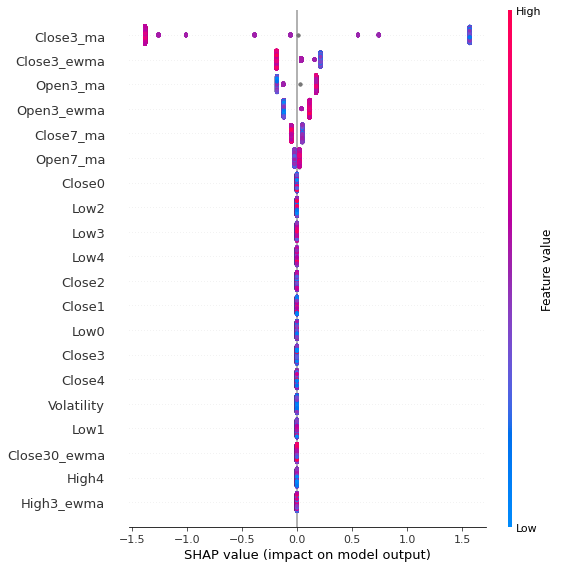

In [ ]:
shap.summary_plot(shap_values[1], X_shap, plot_type="dot")

**0 = close price  increase**

**1 = close price  decrease**

Here with this shap plot we can understand that
*  ***Higher the value of close3_ma  means that close price will be higher than previous day***
*  whereas higher exponential weighted moving avg will give mean  that price will decrease 

Feature importance on validation set

In [ ]:
X_shap=X_val
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_shap)

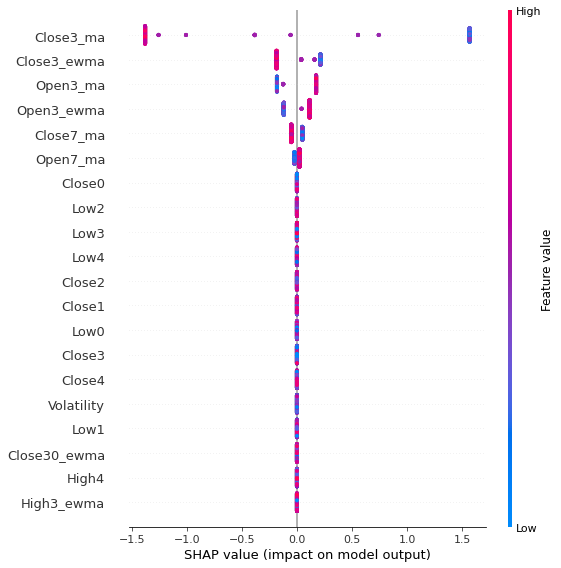

In [ ]:
shap.summary_plot(shap_values[1], X_shap, plot_type="dot")

Feature importance on training set

In [ ]:
X_shap=X_train
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_shap)

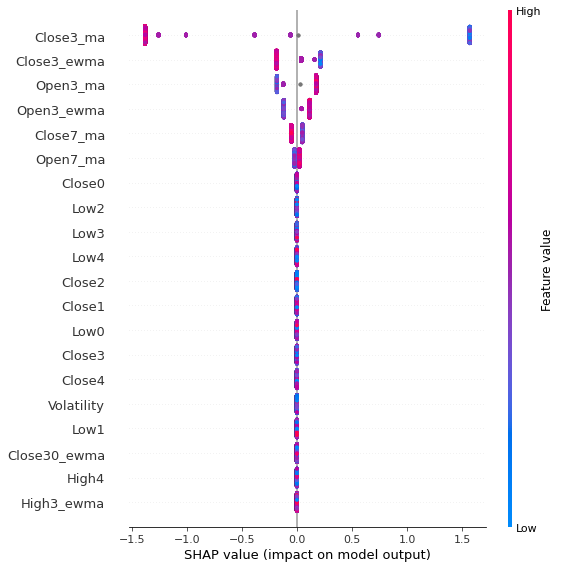

In [ ]:
shap.summary_plot(shap_values[1], X_shap, plot_type="dot")

##Building XGboost XGBClassifier model and analyse the performance on different samples of the dataset

In [ ]:
# Import Libraries for Gboost model building
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
  
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [ ]:
# Train data on XGBClassifier model
xb_model= XGBClassifier(gamma=20)

In [ ]:
xb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=20,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Predicting values for Training, Validation and Testing data sets

In [ ]:
y_train_pred = xb_model.predict(X_train)
y_val_pred = xb_model.predict(X_val)
y_test_pred = xb_model.predict(X_test)

### Accuracy of trained XGBClassifier model on different samples

In [ ]:
print(f'accuracy of training data             {accuracy_score(y_train,y_train_pred)}')
print(f'Accuracy for validation data          {accuracy_score(y_val,y_val_pred)}')
print(f'Accuracy for Testing data             {accuracy_score(y_test,y_test_pred)}')

accuracy of training data             0.916919959473151
Accuracy for validation data          0.8864994026284349
Accuracy for Testing data             0.8739495798319328


## Confusion matrix from XGBClassifier model on Training, Validation and Testing data sets

In [ ]:
print(f'Confusion matrix for test data  \n {confusion_matrix(y_train,y_train_pred)}')
print(f'Confussion Matrix for validation data  \n {confusion_matrix(y_val,y_val_pred)}')
print(f'Confusion matrix for test data \n { confusion_matrix(y_test,y_test_pred)}')  

Confusion matrix for test data  
 [[1964  152]
 [ 176 1656]]
Confussion Matrix for validation data  
 [[411  42]
 [ 53 331]]
Confusion matrix for test data 
 [[235  34]
 [ 26 181]]
